# Ex09 - Técnicas de segmentação

### Parte 1 - Segmentando múltiplos objetos por limiarização

A limiarização também pode ser feita em imagens com mais de um objeto e usando limiares múltiplos. Tente segmentar separadamente a cartela de comprimidos em uma imagem e os comprimidos em outra. Utilize o hstograma da imagem para escolher os limiares.

In [36]:
im2 = mpimg.imread('../data/astablet.tif')
#plt.imshow(im2, cmap='gray')

### Parte 2 - Demonstração da limiarização por Otsu

Tente melhorar a demonstração da limiarização por Otsu ([Demo](../master/otsudemo.ipynb)).

### Parte 3 - Segmentação por watershed

Tentem reproduzir a demonstração de segmentação por watershed da antiga toolbox ([pdf](../data/ia870_iadbeef.pdf)). Vocês podem usar as funções de watershed implementadas na biblioteca *scipy.ndimage.measurements* ou *skimage.morphology*. Você pode também se inspirar no Seminário do Eduardo ([link](./Seminarios/Watershed.ipynb)).
Quem quiser conhecer todos os algoritmos da Transformada de Watershed, eles estão descritos na Toolbox de Watershed desenvolvida por um de nossos alunos ([Toolbox Watershed](http://adessowiki.fee.unicamp.br/adesso/wiki/watershed/view/))

## Resolução parte 1

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from PIL import Image
import sys,os
from scipy import signal

ia898path = os.path.abspath('../../')
if ia898path not in sys.path:
    sys.path.append(ia898path)
import ia898.src as ia

In [21]:
def histogram(f):

    return np.bincount(f.ravel())

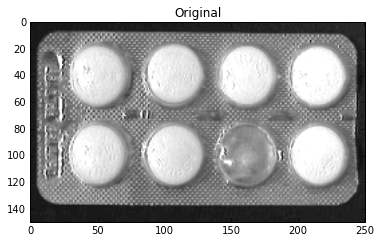

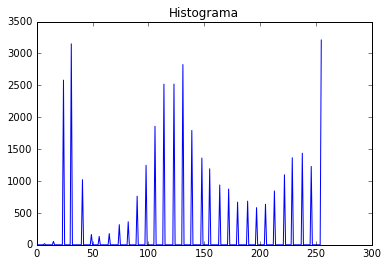

In [68]:
im = mpimg.imread('../data/astablet.tif')

im_h = histogram(im)

plt.imshow(im, cmap='gray')
plt.title('Original')
plt.show()
plt.plot(im_h)
plt.title('Histograma')
plt.show()

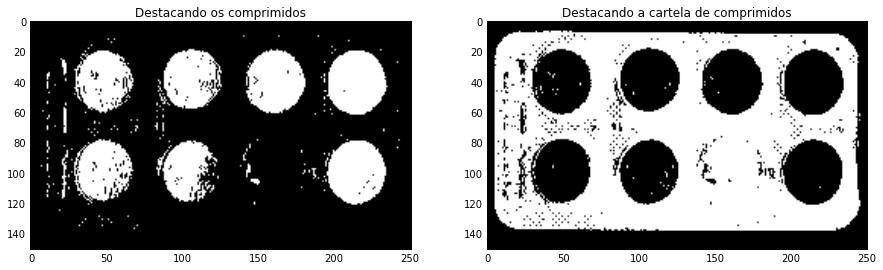

In [336]:
im = mpimg.imread('../data/astablet.tif')
im[im < 215] = 0
im[im >= 215] = 255
g = im

im = mpimg.imread('../data/astablet.tif')
im[im < 60] = 0
im[im >= 200] = 0
im[im >= 60] = 255
g2 = im

fig, ax = plt.subplots(1, 2, figsize=(15, 15))
ax[0].imshow(g, cmap='gray')
ax[1].imshow(g2, cmap='gray')
ax[0].set_title('Destacando os comprimidos')
ax[1].set_title('Destacando a cartela de comprimidos')


Observando o histogramas, é possível verificar 3 grupos de níveis de cinza, e através disso, foi possível realizar a segmentação (limiarização) binária da imagem.

## Resolução parte 2

In [273]:
def threshold_otsu(image, nbins):
    hist, bin_centers = np.histogram(image, nbins)
    hist = hist.astype(float)
    #print hist.shape, hist
    #print bin_centers[:-1:].shape
    # class probabilities for all possible thresholds
    weight1 = np.cumsum(hist)
    weight2 = np.cumsum(hist[::-1])[::-1]
    # class means for all possible thresholds
    mean1 = np.cumsum(hist * bin_centers[:-1]) / weight1
    mean2 = (np.cumsum((hist * bin_centers[:-1])[::-1]) / weight2[::-1])[::-1]

    # Clip ends to align class 1 and class 2 variables:
    # The last value of `weight1`/`mean1` should pair with zero values in
    # `weight2`/`mean2`, which do not exist.
    variance12 = weight1[:-1] * weight2[1:] * (mean1[:-1] - mean2[1:]) ** 2
    
    idx = np.argmax(variance12)
    threshold = bin_centers[:-1][idx]
    return threshold

155.0


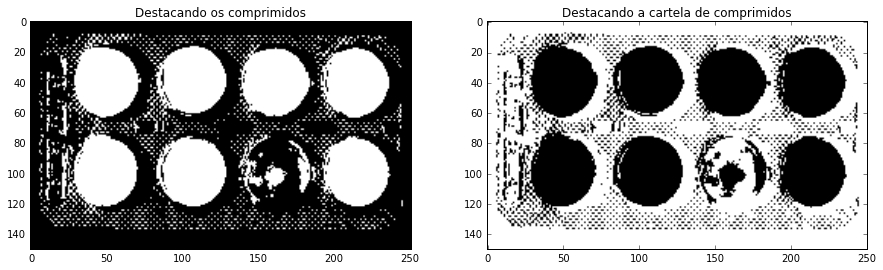

In [274]:
f = mpimg.imread('../data/astablet.tif')

nbins = np.max(f)

t = threshold_otsu(f, nbins)
print t

z = f > t
z2 = f < t

fig2, ax = plt.subplots(1, 2, figsize=(15, 15))
ax[0].imshow(z, cmap='gray')
ax[1].imshow(z2, cmap='gray')
ax[0].set_title('Destacando os comprimidos')
ax[1].set_title('Destacando a cartela de comprimidos')

O método de Otsu é capaz de realizar o threshold automático da imagem calculando a máxima variância e encontrando o mínimo global como o threshold. Podemos observar na figura, que para separar o comprimido o resultado foi melhor em relação a limiarização manual, entretanto para a cartela de comprimido não apresentou o mesmo sucesso. Para corrigir, esse problema, foi proposto o método de otsu para encontrar mínimos locais. 

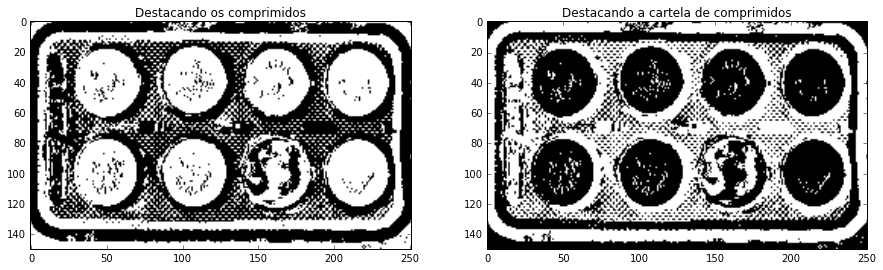

In [31]:
f = mpimg.imread('../data/astablet.tif')

#from skimage import data
from skimage import filters 
from skimage.filters.rank import otsu
from skimage.morphology import disk
#img = data.camera()
local_otsu = otsu(f, disk(8))
th_img = f >= local_otsu
th_img2 = f < local_otsu

#plt.imshow(local_otsu, cmap='gray')
#plt.show()

fig3, ax = plt.subplots(1, 2, figsize=(15, 15))
ax[0].imshow(th_img, cmap='gray')
ax[1].imshow(th_img2, cmap='gray')
ax[0].set_title('Destacando os comprimidos')
ax[1].set_title('Destacando a cartela de comprimidos')

Para calcular o método de otsu local, foi utilizado as bibliotecas do skimage, o qual contém subpacotes baseados em morfologia. Esse algoritmo utiliza uma diferença da expansão e erosão de chamada de "disk" e utilizamos um valor igual a 8. Podemos observar que para encontrar o comprimido utilizando o método de otsu de mínimo local não foi tão eficiente, mas em relação a cartelha apresentou resultados um pouco melhores que o método de otsu de mínimo global.


## Resolução parte 3

In [4]:
#beef = mpimg.imread('../data/beef.tif')
#plt.imshow(beef)

beef = Image.open('../data/20160102_155041.jpg').convert('L')


/home/fernanda/anaconda3/lib/python3.7/site-packages/mkl_fft/_numpy_fft.py:1044: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output = mkl_fft.rfftn_numpy(a, s, axes)
/home/fernanda/anaconda3/lib/python3.7/site-packages/skimage/util/arraycrop.py:175: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped = np.array(ar[slices], order=order, copy=True)


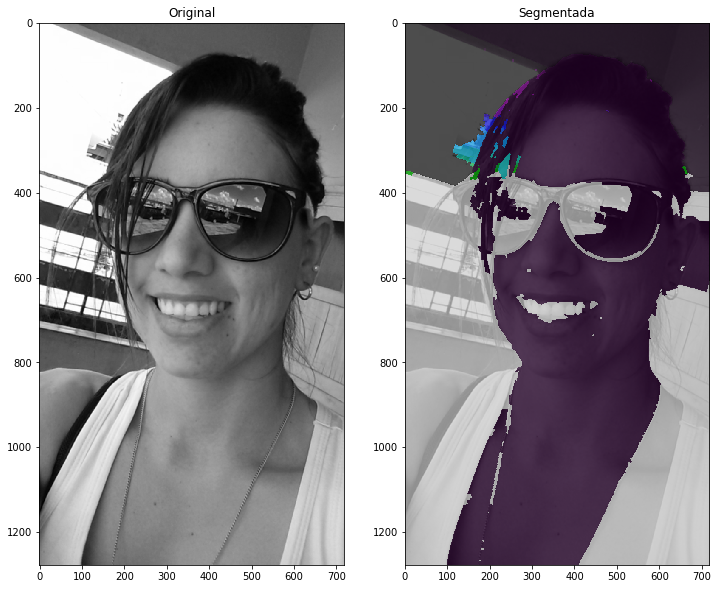

In [17]:
from scipy import ndimage as ndi
import matplotlib.pyplot as plt

from skimage.morphology import watershed, disk
#from skimage import data
from skimage.filters import rank
from skimage.util import img_as_ubyte


#image = np.array(Image.open('../data/beef.tif').convert('L'))
h = np.ones((3,3))/(3*3)
image = ia.normalize(signal.convolve(beef, h, mode='valid'))

# denoise image
denoised = rank.median(image, disk(2))

# find continuous region (low gradient -
# where less than 10 for this image) --> markers
# disk(5) is used here to get a more smooth image
markers = rank.gradient(denoised, disk(2)) < 15
markers = ndi.label(markers)[0]

markers[ markers > 128] = 255
#markers[ markers < 122] = 0
m = markers


# local gradient (disk(2) is used to keep edges thin)
gradient = rank.gradient(denoised, disk(2))

# process the watershed
labels = watershed(gradient, m)

# display results
fig, ax = plt.subplots(1, 2, figsize=(12, 12))
#ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray, interpolation='nearest')
ax[0].set_title("Original")

ax[1].imshow(image, cmap=plt.cm.gray, interpolation='nearest')
ax[1].imshow(labels, cmap=plt.cm.nipy_spectral, interpolation='nearest', alpha=.7)
ax[1].set_title("Segmentada")

#for a in ax:
#    a.axis('off')

#fig.tight_layout()
plt.show()

(-0.5, 717.5, 1277.5, -0.5)

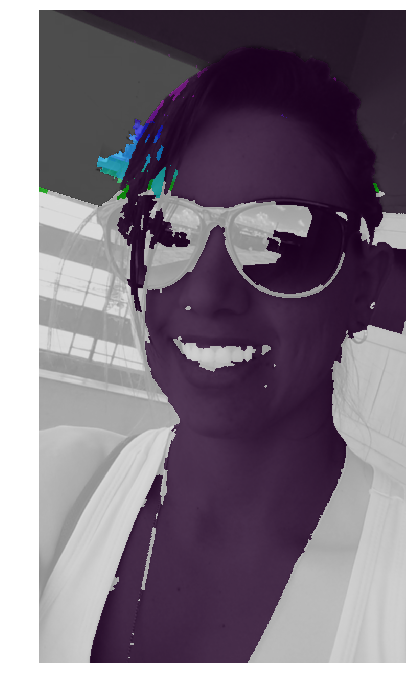

In [23]:
plt.figure(figsize=(12, 12))
plt.imshow(image, cmap=plt.cm.gray, interpolation='nearest')
plt.imshow(labels, cmap=plt.cm.nipy_spectral, interpolation='nearest', alpha=.7)
plt.axis('off')

O watershed não é um algoritmo muito trivial. Eu tentei desenvolver meu algoritmo  de watershed (segue abaixo no rascunho), seuindo os passos ditos em aula. A maior dificuldade foi implementar os marcadores internos através na erosão e não tive sucesso. A resolução acima foi inspirado no pacote de skimage, e não obtive um resultado como eu esperava. Além disso, antes de aplicar o watershed, eu utilizei um filtro de média para minimizar os pontos internos no beef.

## Rascunho

In [323]:
def threshold_otsu_local(image, nbins):
    hist, bin_centers = np.histogram(image, nbins)
    hist = hist.astype(float)
    #print hist.shape, hist
    #print bin_centers[:-1:].shape
    # class probabilities for all possible thresholds
    weight1 = np.cumsum(hist)
    weight2 = np.cumsum(hist[::-1])[::-1]
    # class means for all possible thresholds
    mean1 = np.cumsum(hist * bin_centers[:-1]) / weight1
    mean2 = (np.cumsum((hist * bin_centers[:-1])[::-1]) / weight2[::-1])[::-1]

    # Clip ends to align class 1 and class 2 variables:
    # The last value of `weight1`/`mean1` should pair with zero values in
    # `weight2`/`mean2`, which do not exist.
    variance12 = weight1[:-1] * weight2[1:] * (mean1[:-1] - mean2[1:]) ** 2
    ind = variance12
    idx2 = np.argsort(variance12)
    var1 = idx2[-1]
    var2 = idx2[-2]
    var3 = idx2[-3]
    print var1, var2, var3
    #idx = np.argmax(variance12)
    threshold = bin_centers[:-1][var1]
    return threshold, ind

155 163 156


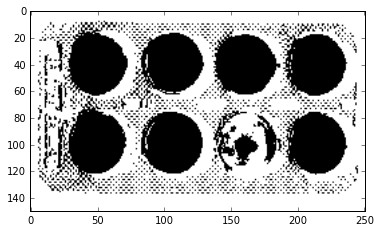

In [324]:
f = mpimg.imread('../data/astablet.tif')

nbins = np.max(f)

th, ind = threshold_otsu_local(f, nbins)

#plt.plot(ind)

r = f < th

plt.imshow(r, cmap='gray')

In [227]:
def threshold_otsu2d(image, nbins):
    hist, xbin, ybin = np.histogram2d(image[0].ravel(), image[1].ravel(), nbins)
    hist = hist.astype(float)
    print hist.shape, hist
    #print xbin[:-1:].shape, ybin[:-1:].shape
    eps = 1e-10
    # class probabilities for all possible thresholds
    weight1 = np.cumsum(hist[0]) * np.cumsum(hist[1])
    weight2 = np.cumsum(hist[0][::-1])[::-1] * np.cumsum(hist[1][::-1])[::-1]
    # class means for all possible thresholds
    mean1 = np.cumsum(hist[0] * xbin[:-1:]) / (weight1 + eps)
    mean2 = (np.cumsum((hist[0] * xbin[:-1])[::-1]) / (weight2[::-1])[::-1] + eps)
    
    mean12 = np.cumsum(hist[1] * ybin[:-1:]) / (weight1 + eps)
    mean22 = (np.cumsum((hist[1] * ybin[:-1])[::-1]) / (weight2[::-1])[::-1] + eps)

    # Clip ends to align class 1 and class 2 variables:
    # The last value of `weight1`/`mean1` should pair with zero values in
    # `weight2`/`mean2`, which do not exist.
    variance12 = weight1[:-1] * weight2[1:] * (mean1[:-1] - mean2[1:]) ** 2
    variance1222 = weight1[:-1] * weight2[1:] * (mean12[:-1] - mean22[1:]) ** 2

    idx = np.argmax(variance12)
    threshold = xbin[:-1][idx]
    
    idx2 = np.argmax(variance1222)
    threshold2 = ybins[:-1][idx2]
    return threshold, threshold2

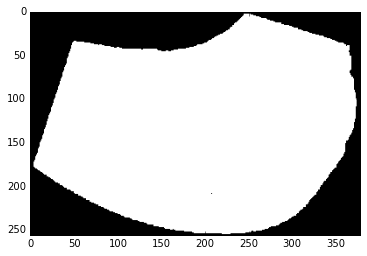

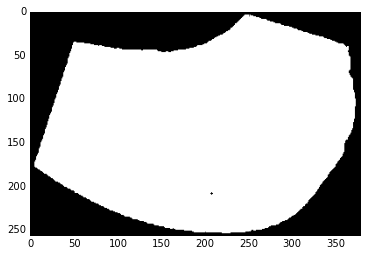

In [35]:
#tentativa watershed
import scipy.ndimage as ndimage
from skimage import measure, morphology, segmentation
#beef = mpimg.imread('../data/beef.tif')
beef = Image.open('../data/beef.tif').convert('L')
#filtro de media
h = np.ones((3,3))/(3*3)
beef2 = signal.convolve(beef, h, mode='valid')

#Marcador externo
beef2[beef2 > 0] = 255
beef_ext = beef2

#marcador interno
boneMask = beef2 >=200
struct = ndimage.generate_binary_structure(2, 1)
beef_int = morphology.binary_erosion(boneMask.astype('uint'), struct)
#ndimage.binary_erosion(boneMask.astype('uint'), structure=struct, iterations=1)

plt.imshow(beef_ext, cmap='gray')
plt.show()
plt.imshow(beef_int, cmap='gray')